In [ ]:
"""
TO DO 1 - End code/content:
    - Recheck and modify make_dataset notebook.
    - Add silhouette or elbow analysis to determine the number of clusters.
    - EDA: better? Add the data_pipeline? Or put data_pipeline in another notebook?
    - main.ipynb with analysis from A to Z?
    - 
    """

In [71]:
import random
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [84]:
dataset = pd.read_csv("../data/processed/labeled_dataset.csv")

In [85]:
dataset.head()

,ethereum_address,ether_balance,unique_tokens,unique_transfers,mined_blocks,outgoing_txns,incoming_txns,total_eth_sent,avg_eth_sent,total_usd_sent,...,monthly_eth_recd,monthly_usd_recd,contracts_created,contract_txns_sent,incoming_avg_time_btwn_txns,incoming_std_time_btwn_txns,outgoing_avg_time_btwn_txns,outgoing_std_time_btwn_txns,num_tokens_used,Entity
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,443.735122,587,245377,0,479582,492072,2.437018e+06,5.081546,1.066724e+09,...,314641.354178,1.375943e+08,0,0,35.793619,841.981905,36.758222,91.156553,281,Exchange
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,1031.186386,865,472190,0,392467,312401,5.418637e+06,13.806606,2.131017e+09,...,556867.740550,2.250757e+08,0,0,77.365013,6066.634246,53.006365,469.834039,341,Exchange
2,0x564286362092d8e7936f0549571a803b203aaced,23892.712593,502,109404,0,615240,678,5.823040e+06,9.464664,3.502765e+09,...,537952.716735,3.228961e+08,0,0,39191.246677,60944.567004,43.327104,1286.006034,261,Exchange
3,0x0016eccecffc25b94050187017eb59fa05c029aa,126.407467,54,6180,0,2998,481,4.479533e+03,1.494174,1.205682e+06,...,745.774408,2.516832e+05,0,0,32761.102083,116946.601644,5212.212212,19082.175526,40,NaN
4,0xbe708d227f6dfa0b8f2698bf543b949dfe4e28fb,269.029806,202,1462,0,10164,243,2.077182e+04,2.043666,4.969486e+06,...,38.314152,1.370181e+04,0,0,77338.574380,178129.840874,1845.206238,6596.557607,166,NaN


In [86]:
def data_pipeline(df):
    # Strip address and label columns
    data = df.iloc[:,1:-1]
    log = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
    scale = StandardScaler()
    pca =PCA(n_components=data.shape[1])
    
    # Build pipeline
    pipe = Pipeline([('log', log ),
                     ('scale', scale ),
                     ('PCA', pca)])
    results = pipe.fit_transform(data)
    
    return pipe, results

In [87]:
pipe, results = data_pipeline(dataset)

In [88]:
def cluster(results, n_clusters):
    cl = KMeans(n_clusters, n_init=20, max_iter=500,n_jobs=-1, verbose=0)
    return cl.fit(results)

In [89]:
cl = cluster(results, 8)

In [90]:
def calc_tsne(results, n_components=2, perplexity=20, n_iter=300,verbose=1):
    '''
    Calculated tsne for dataset'''
    time_start = time.time()
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter,verbose=verbose,learning_rate=100)
    tsne_results = tsne.fit_transform(results)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    return tsne_results

In [91]:
tsne_results = calc_tsne(results, perplexity=50,n_iter=2000)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6057 samples in 0.054s...
[t-SNE] Computed neighbors for 6057 samples in 2.390s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6057
[t-SNE] Computed conditional probabilities for sample 2000 / 6057
[t-SNE] Computed conditional probabilities for sample 3000 / 6057
[t-SNE] Computed conditional probabilities for sample 4000 / 6057
[t-SNE] Computed conditional probabilities for sample 5000 / 6057
[t-SNE] Computed conditional probabilities for sample 6000 / 6057
[t-SNE] Computed conditional probabilities for sample 6057 / 6057
[t-SNE] Mean sigma: 0.922569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.444626
[t-SNE] KL divergence after 2000 iterations: 1.760384
t-SNE done! Time elapsed: 113.00984454154968 seconds


In [ ]:
# Add silhouette analysis to know how many clusters?

In [92]:
def plot_tsne(cl, tsne_results):
    '''
    plot'''
    
    cm = plt.get_cmap('nipy_spectral')

    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(111)

    for c in np.unique(cl.labels_):
        mask = cl.labels_==c
        if np.sum(mask) <1:
            lbl = '_nolegend_'
        else:
            lbl = c
        plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], s=20, alpha=.4,label=lbl)

    leg = plt.legend(bbox_to_anchor=(1, 1))
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

    plt.title('T-SNE', fontsize=20)
    plt.xlabel('first principal component')
    plt.ylabel('second principal component')
    plt.show()

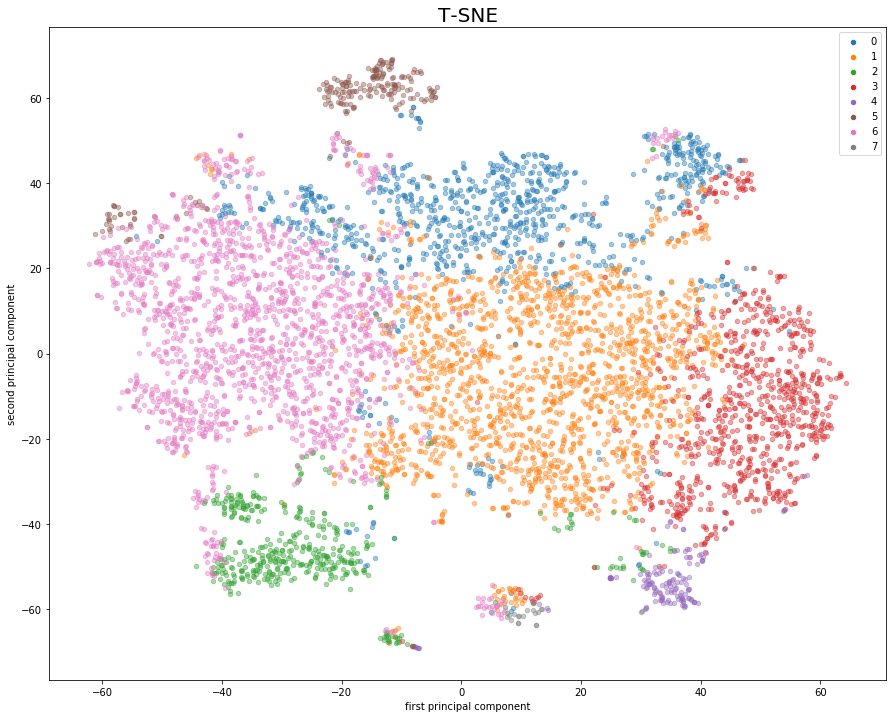

In [93]:
plot_tsne(cl, tsne_results)

In [94]:
def plot_tsne_with_labels(tsne_results,df, dflabel,categs,colors):
    #need to mask df based on which results were kept from the reclustering
    
    labeled_addresses = dflabel["ethereum_address"].values
    labelmask = np.array([addr in labeled_addresses for addr in df["ethereum_address"] ] )
    
    #helper function for category mask
    def cat(addr, labeled_addresses, dflabel):
        if addr not in labeled_addresses:
            return False
        else:
            idx = int(np.where(labeled_addresses==addr)[0][0])
            return dflabel.iloc[idx, 1]

    subset, not_subset  = tsne_results[labelmask] , tsne_results[~labelmask]
    fig = plt.figure(figsize=(15,12))
    #not labelled points
    plt.scatter(not_subset[:,0], not_subset[:,1], s=20, c='gray', alpha=.3)

    #categories
    cats = np.array([cat(addr, labeled_addresses, dflabel) for addr in df["ethereum_address"]]) #[address_mask] ]) #added address mask for all clusters

    for c in list(dflabel["Entity"].unique()):
        mask = dflabel["Entity"]==c
        if np.sum(mask) <1:
            lbl = '_nolegend_'
        else:
            lbl = c

        #category mask
        catmask = cats == c

        if c in categs:
            idx=categs.index(c)
            color = colors[idx]

            plt.scatter(tsne_results[(labelmask & catmask)][:,0], tsne_results[(labelmask & catmask)][:,1], s=20,c=color, alpha=1,label=lbl)

    leg = plt.legend(bbox_to_anchor=(1, 1))
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

    plt.title('T-SNE', fontsize=20)
    plt.xlabel('first principal component')
    plt.ylabel('second principal component')
    plt.show()

In [95]:
def find_category_of_cluster(cl,dflabel, category="Exchange"):
    #assign cluster number with the most exchanges
    type_cluster = 0
    num_of_type = 0
    lbl_density=0
    print(category)
    for clust in np.unique(cl.labels_):
        size_of_cluster = np.sum(cl.labels_==clust)
        
        
        mask = dflabel["Entity"]==clust
        d = dflabel[mask]
        num = np.sum(d["Entity"]==category)
        density = num / size_of_cluster
        if num > num_of_type:
            lbl_density=density
            num_of_type = num
            type_cluster = clust
        print('cluster number   {}   number of type found: {}    cluster size: {}   label density: {}'.format(clust,num,size_of_cluster,density))
    return type_cluster

In [96]:
#highlighting clusters of interest
categs = ('Exchange', 'Mining')
colors = ('blue', 'red')

d = {}
for c in categs:
    d[c] = find_category_of_cluster(cl, dataset, category=c)

clusters= list(d.values())

Exchange
cluster number   0   number of type found: 0    cluster size: 973   label density: 0.0
cluster number   1   number of type found: 0    cluster size: 1730   label density: 0.0
cluster number   2   number of type found: 0    cluster size: 438   label density: 0.0
cluster number   3   number of type found: 0    cluster size: 845   label density: 0.0
cluster number   4   number of type found: 0    cluster size: 142   label density: 0.0
cluster number   5   number of type found: 0    cluster size: 220   label density: 0.0
cluster number   6   number of type found: 0    cluster size: 1688   label density: 0.0
cluster number   7   number of type found: 0    cluster size: 21   label density: 0.0
Mining
cluster number   0   number of type found: 0    cluster size: 973   label density: 0.0
cluster number   1   number of type found: 0    cluster size: 1730   label density: 0.0
cluster number   2   number of type found: 0    cluster size: 438   label density: 0.0
cluster number   3   numb

In [97]:
dflabel = dataset[dataset["Entity"].notnull()]

In [98]:
dflabel = dflabel[["ethereum_address", "Entity"]]

In [99]:
dflabel

,ethereum_address,Entity
0,0x0d0707963952f2fba59dd06f2b425ace40b492fe,Exchange
1,0x6cc5f688a315f3dc28a7781717a9a798a59fda7b,Exchange
2,0x564286362092d8e7936f0549571a803b203aaced,Exchange
6,0x0681d8db095565fe8a346fa0277bffde9c0edbbf,Exchange
7,0x1062a747393198f70f71ec65a582423dba7e5ab3,Exchange
...,...,...
5359,0x29aea5f51879982fdb53fb4f0720823ed77e49dc,Mining
5436,0x00192fb10df37c9fb26829eb2cc623cd1bf599e8,Mining
5571,0x005e288d713a5fb3d7c9cf1b43810a98688c7223,Mining
5685,0xf32866d5ce9a9b5673e076be48abcd6ed48ade78,Mining


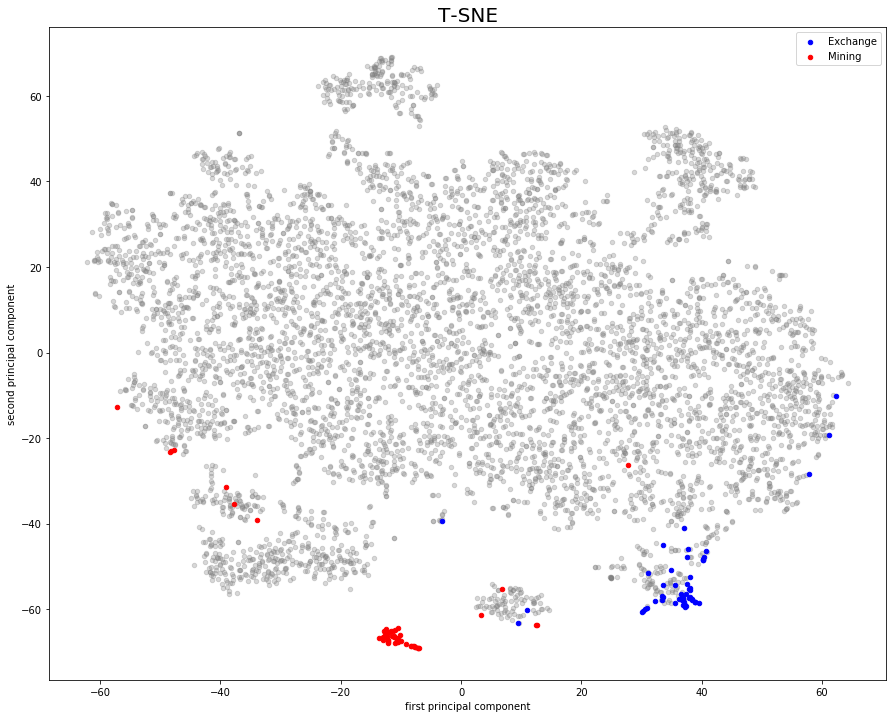

In [101]:
plot_tsne_with_labels(tsne_results, dataset, dflabel, categs, colors)

In [102]:
data_with_labels = dataset[dataset["Entity"].notnull()]

In [106]:
pipe_2, results_2 = data_pipeline(data_with_labels)

In [107]:
cl_2 = cluster(results, 2)

In [108]:
tsne_results_2 = calc_tsne(results_2, perplexity=50,n_iter=2000)

[t-SNE] Computing 103 nearest neighbors...
[t-SNE] Indexed 104 samples in 0.000s...
[t-SNE] Computed neighbors for 104 samples in 0.032s...
[t-SNE] Computed conditional probabilities for sample 104 / 104
[t-SNE] Mean sigma: 3.871874
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.581951
[t-SNE] KL divergence after 750 iterations: 0.096580
t-SNE done! Time elapsed: 2.0872623920440674 seconds


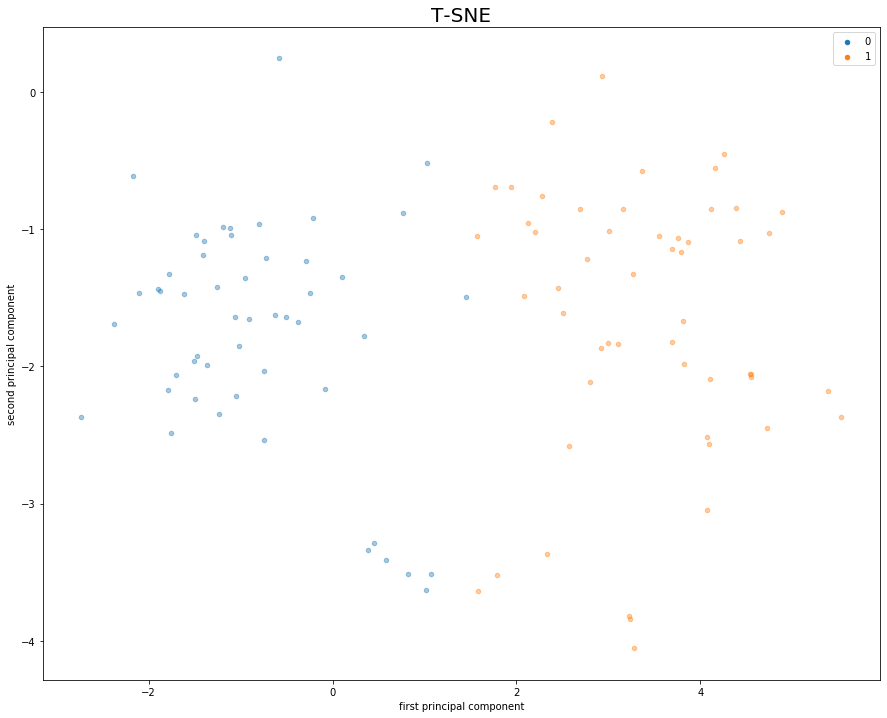

In [109]:
plot_tsne(cl_2, tsne_results_2)